In [25]:
#Cubic spline tutorial from https://www.youtube.com/watch?v=lZEI36_Bsv4
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

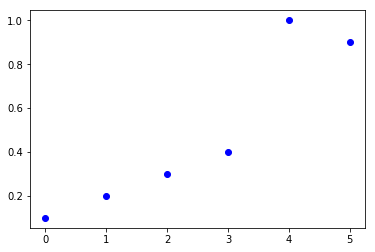

In [26]:
x = np.arange(6)
y = np.arange(0.1, 0.7, 0.1)
y[4] = 1.0
y[5] = 0.9
plt.plot(x, y, 'bo')

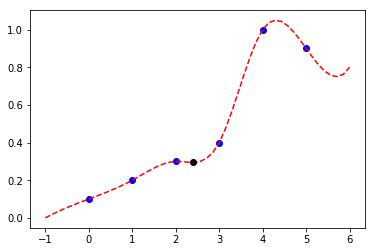

In [39]:
m = GEKKO(remote=True)
m.x = m.Param(value=np.linspace(-1,6))
m.y = m.Var()
m.cspline(m.x,m.y,x,y)
m.options.IMODE=2
m.solve(disp=False)

p = GEKKO()
p.x = p.Var(value=3, lb=0, ub=5)
p.y = p.Var()
p.Obj(p.y)
p.options.IMODE=2
p.cspline(p.x,p.y,x,y)
p.solve(disp=False)

plt.plot(x, y, 'bo',label='data')
plt.plot(m.x,m.y, 'r--', label='spline')
plt.plot(p.x,p.y, 'ko', label='opt')